# 📊 A/B Test Analysis 

In this notebook, we analyze A/B test results using both conversion rate and revenue to determine if group B performs significantly better than group A.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv("ab_test.csv")
df.head()

,user_id,group,converted,revenue
0,A_0,A,0,0.00
1,A_1,A,1,41.73
2,A_2,A,0,0.00
3,A_3,A,0,0.00
4,A_4,A,0,0.00


## 📈 Summary by Group

In [2]:
# Grouped summary: count, conversion rate, average revenue
summary = df.groupby("group").agg(
    users=('user_id', 'count'),
    conversions=('converted', 'sum'),
    conversion_rate=('converted', 'mean'),
    average_revenue=('revenue', 'mean'),
    revenue_if_converted=('revenue', lambda x: x[x > 0].mean())
)
summary

,users,conversions,conversion_rate,average_revenue,revenue_if_converted
group,,,,,
A,1000,124,0.124,6.21331,50.107339
B,1000,152,0.152,8.48317,55.810329


## 🧪 Hypothesis Testing
We will test:
1. Conversion rate (binary)
2. Revenue per user

In [3]:
# Split groups
group_A = df[df["group"] == "A"]
group_B = df[df["group"] == "B"]

# T-test: conversion
t_stat_conv, p_val_conv = stats.ttest_ind(group_A["converted"], group_B["converted"], equal_var=False)

# T-test: revenue
t_stat_rev, p_val_rev = stats.ttest_ind(group_A["revenue"], group_B["revenue"], equal_var=False)

print("🔹 Conversion Rate:")
print(f"T-statistic = {t_stat_conv:.4f}, P-value = {p_val_conv:.4f}")
print("✅ Significant" if p_val_conv < 0.05 else "❌ Not significant")

print("\n🔹 Revenue per User:")
print(f"T-statistic = {t_stat_rev:.4f}, P-value = {p_val_rev:.4f}")
print("✅ Significant" if p_val_rev < 0.05 else "❌ Not significant")

🔹 Conversion Rate:
T-statistic = -1.8159, P-value = 0.0695
❌ Not significant

🔹 Revenue per User:
T-statistic = -2.7047, P-value = 0.0069
✅ Significant


## 📊 Visualizations

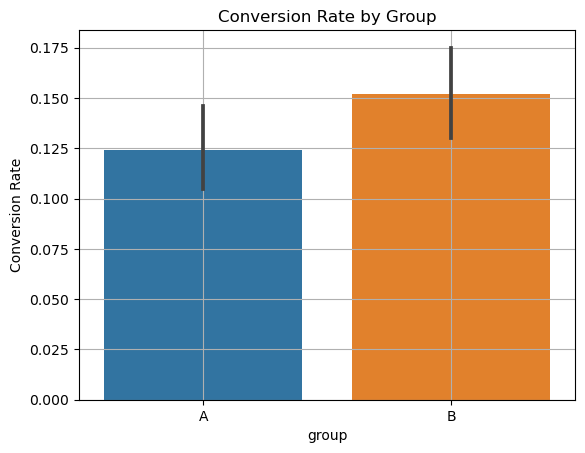

In [4]:
# Conversion rate barplot
sns.barplot(data=df, x="group", y="converted", errorbar=('ci', 95))
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.show()

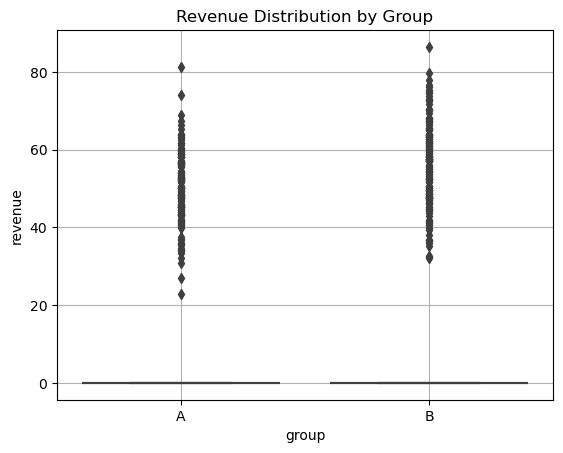

In [5]:
# Revenue distribution
sns.boxplot(data=df, x="group", y="revenue")
plt.title("Revenue Distribution by Group")
plt.grid(True)
plt.show()